# Chapter 5 Conceptual Exercises

## Exercise 1

$\alpha$: fraction of money invested in $X$.

$$f(\alpha) = Var(\alpha X + (1-\alpha)Y)$$

The next property of the variance will be used:

$$Var(aX+bY) = a^2Var(X) + b^2Var(Y) + 2abCov(X,Y)$$

Using the property:

$$f(\alpha) = \alpha^2Var(X) + (1-\alpha)^2Var(Y) + 2\alpha(1-\alpha)Cov(X,Y)$$

Taking the derivative of $f(\alpha)$ with respect to $\alpha$ and equating to zero:

$$2\alpha Var(X) - 2(1-\alpha)Var(Y) + 2(1-2\alpha)Cov(X,Y) = 0$$

Joining terms with $\alpha$:

$$\alpha(Var(X) + Var(Y) - 2Cov(X,Y)) = Var(Y) - 2Cov(X,Y)$$

Solving for $\alpha$ and renaming variances:

$$\boxed{\alpha = \frac{\sigma^2_Y - \sigma_{XY}}{\sigma^2_X+\sigma^2_Y-2\sigma_{XY}}}$$

## Exercise 2

Probability that a given observation is part of a bootstrap sample.

a) We have a sample from a set of *n* observations. We are being asked that the first bootstrap observation is a different one than another.

$$P(s_1 \neq j) = 1 - P(s_1 = j) = 1- \frac{1}{n}$$

b) This is equivalent, but with the second observation:

$$P(s_2 \neq j) = 1 - P(s_2 = j) = 1- \frac{1}{n}$$

c) Probability that the $jth$ observation is not in the bootstrap sample. From *a)* and *b)* we saw that the probability that a given observation (any of them) is different than the $jth$ observation is $1-1/n$. Here we are asked that the $jth$ observation *is not* present in the sample:

$$P(s_i \neq j) = 1- \frac{1}{n}$$

Since we are sampling *n* times with replacement, the probabilities are independent. For independent events, we can multiply the joined probabilities:

$$P(s_j \notin sample) = \prod_{i=1}^n P(s_i \neq j)$$

$$P(s_j \notin sample) = \prod_{i=1}^n \left(1-\frac{1}{n}\right)$$

$$\boxed{P(s_j \notin sample) = \left(1-\frac{1}{n}\right)^n}$$

d) For $n=5$, the probability that the $jth$ observation is in the bootstrap sample is:

$$P(s_j \in sample) = 1-\left(1-\frac{1}{5}\right)^5 = 0.6723$$

e) For $n=100$:

$$P(s_j \in sample) = 1-\left(1-\frac{1}{100}\right)^{100} = 0.634$$

f) For $n=10000$:

$$P(s_j \in sample) = 1-\left(1-\frac{1}{10000}\right)^{10000} = 0.632$$

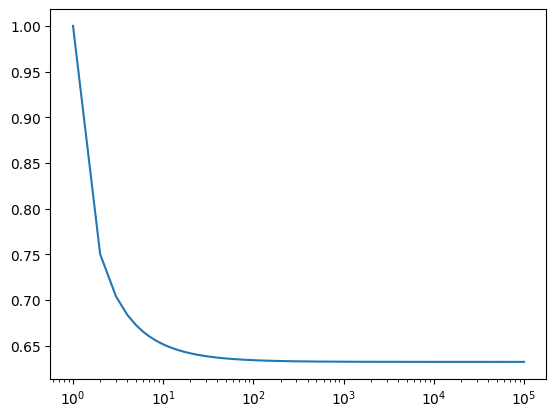

In [1]:
import matplotlib.pyplot as plt

n = list(range(1, 100001))
p = [1-(1-1/x)**x for x in n]
plt.plot(n, p)
plt.xscale('log')

In [27]:
import numpy as np
rng = np.random.default_rng(10)
store = np.empty(10000)
for i in range(10000):
    # The probability of finding 4 is 1/100 = 0.01
    store[i] = np.sum(rng.choice(100, size=100, replace=True) == 4) > 0

np.mean(store)

0.6362

In theory, the probability of choosing the 4th element in an array of 100 elements should be $1/100=0.01$.

When making bootstrap samples, the final probability is close to 63.5%.

## Exercise 3

Review k-fold cross-validation

a) k-fold cross-validation takes the n observations and divides it into $k$ groups (or folds) of approximately the same size.

The first fold is treated as a validation set, and the rest of the folds are used to train (fit) the method. Once the method is fitted, the mean squared error is computed using the validation set: $MSE_1$.

The process is repeated, this time using the second fold as validation set, and the rest to train. $MSE_2$ is obtained.

After making this process with the $k$ folds, we obtain $k$ mean squared errors, $MSE_k$. The k-fold Cross Validation (CV) is obtained by averaging all the mean squared errors:

$$CV_{(k)} = \frac{1}{k}\sum_{i=1}^k MSE_i$$

b) Advantages/disadvantages of k-fold CV relative to:
    
  * **i. Validation set approach**: The validation set approach divides the $n$ observations in a train set and a validation (test) set only once. The disadvantage is that the MSE will be less precise compared to k-fold CV. The advantage is that it is computationally less expensive.
  * **ii. LOOCV**: Leave One Out Cross Validation is a special case of k-fold CV when $k=n$. One disadvantage of using a large value of $k$ instead of 5 or 10 is that it is computationally more expensive.

## Exercise 4

The standard deviation of a prediction $Y$, given a predictor $X$, can be obtained using *bootstrap*. If the complete dataset contains *n* observations, we can take *m* samples with replacement. On each of these samples, we train the model and use it to make a prediction using the $X$ observation. The results $Y_i$ will be different, and with these values the standard deviation can be obtained.